# ● Questions: 

○ Q1: Show the predictive framework you designed. 

    Hint: What features do you extract? What algorithms do you use in the framework? 

○ Q2: Explain the validation method you use. 

    Hint: Leave-one-out, Holdout, k-fold, or other methods? 

○ Q3: Explain the evaluation metric you use. 

    Hint: Don't just show the prediction results, you should show the effectiveness of your framework (e.g., using a confusion matrix). 

○ Q4: Show the validation results and give a summary of results. 


# Import

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!apt-get -y install openjdk-8-jre-headless
!pip install pyspark

Reading package lists... Done
Building dependency tree       
Reading state information... Done
openjdk-8-jre-headless is already the newest version (8u312-b07-0ubuntu1~18.04).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 42 not upgraded.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import os
import numpy as np
import pandas as pd
!pip install xgboost
import xgboost as xgb
import matplotlib.pyplot as plt
from xgboost import plot_importance, plot_tree
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Time series decomposition
# pip install statsmodels==0.10.2 #!pip install stldecompose
# from stldecompose import decompose
# from .stl import decompose, forecast

# Chart drawing
# pip install plotly
import plotly as py
import plotly.io as pio
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

# Mute sklearn warnings
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)
simplefilter(action='ignore', category=DeprecationWarning)

# Show charts when running kernel
init_notebook_mode(connected=True)

# Change default background color for all visualizations
layout=go.Layout(paper_bgcolor='rgba(0,0,0,0)', plot_bgcolor='rgba(250,250,250,0.8)')
fig = go.Figure(layout=layout)
templated_fig = pio.to_templated(fig)
pio.templates['my_template'] = templated_fig.layout.template
pio.templates.default = 'my_template'

In [ ]:
import pandas as pd
from pyspark.sql import SparkSession
from pyspark import SparkConf, SparkContext
from pyspark.sql.types import IntegerType, StringType
from pyspark.sql.functions import countDistinct, when, udf
import pyspark.sql.functions as F
import pyspark
from datetime import datetime
from calendar import monthrange

In [ ]:
spark = SparkSession.builder.master("local[*]").appName("HW4").getOrCreate()
sparkcontext = spark.sparkContext

## Read data

In [ ]:
path1 = '/content/drive/MyDrive/01_GMBA/2nd_semester(2022)/03-1AM_Big Data Analytics Techniques and Applications/0427_0525HW4/HW4/datasets/2003.csv'
path2 = '/content/drive/MyDrive/01_GMBA/2nd_semester(2022)/03-1AM_Big Data Analytics Techniques and Applications/0427_0525HW4/HW4/datasets/2004.csv'
path3 = '/content/drive/MyDrive/01_GMBA/2nd_semester(2022)/03-1AM_Big Data Analytics Techniques and Applications/0427_0525HW4/HW4/datasets/2005.csv'


# data
data_1 = spark.read.csv(path1, header=True, inferSchema=True)
data_2 = spark.read.csv(path2, header=True, inferSchema=True)
data_3 = spark.read.csv(path3, header=True, inferSchema=True)
data_1.show()

+----+-----+----------+---------+-------+----------+-------+----------+-------------+---------+-------+-----------------+--------------+-------+--------+--------+------+----+--------+------+-------+---------+----------------+--------+------------+------------+--------+-------------+-----------------+
|Year|Month|DayofMonth|DayOfWeek|DepTime|CRSDepTime|ArrTime|CRSArrTime|UniqueCarrier|FlightNum|TailNum|ActualElapsedTime|CRSElapsedTime|AirTime|ArrDelay|DepDelay|Origin|Dest|Distance|TaxiIn|TaxiOut|Cancelled|CancellationCode|Diverted|CarrierDelay|WeatherDelay|NASDelay|SecurityDelay|LateAircraftDelay|
+----+-----+----------+---------+-------+----------+-------+----------+-------------+---------+-------+-----------------+--------------+-------+--------+--------+------+----+--------+------+-------+---------+----------------+--------+------------+------------+--------+-------------+-----------------+
|2003|    1|        29|        3|   1651|      1655|   1912|      1913|           UA|     1017

In [ ]:
from functools import reduce
from pyspark.sql import DataFrame

dfs = [data_1,data_2,data_3]
data_all = reduce(DataFrame.unionAll, dfs)
# data_Year = data_all.select('Year').distinct().collect()
# data_Year

In [ ]:
# %pyspark

from pyspark import SparkContext 
from pyspark.sql import SQLContext
import pyspark.sql.functions as F
from pyspark.sql.types import *
from pyspark.ml.classification import LogisticRegression
from pyspark.mllib.util import MLUtils
from pyspark.ml.feature import OneHotEncoder, StringIndexer, StandardScaler, Imputer, VectorAssembler, SQLTransformer
from pyspark.mllib.evaluation import BinaryClassificationMetrics, MulticlassMetrics
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder, CrossValidatorModel
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.ml import Pipeline, PipelineModel
from pyspark.ml.linalg import Vectors

In [ ]:
# import pyspark.sql.functions as f
# # "Plate", "License Type", "State", "County", "Issue Date", "Violation Time", "Fine Amount", "Precinct", "Violation"
# data_1_1 = data_0.select("County", "Issue Date", "Violation Time", "Fine Amount", "Violation")
# data_1_1.show()

# Data processing

In [ ]:
import pandas as pd
from pyspark.sql import SparkSession
from pyspark import SparkConf, SparkContext
from pyspark.sql.types import IntegerType, StringType
import pyspark.sql.functions as F
import pyspark

In [ ]:
data_0 = data_all
# distinct_UniqueCarrier = data_0.select("UniqueCarrier").distinct().rdd.flatMap(lambda x: x).collect()
# distinct_TailNum = data_0.select("TailNum").distinct().rdd.flatMap(lambda x: x).collect()
# distinct_Origin = data_0.select("Origin").distinct().rdd.flatMap(lambda x: x).collect()
# distinct_Dest = data_0.select("Dest").distinct().rdd.flatMap(lambda x: x).collect()
# distinct_UniqueCarrier

In [ ]:
# data_2 = data_1.select("County","month","day","Violation_Hour","Issue_Weekday","avg(Fine Amount)","count(Violation)")
# data_1 = data_0.select(data_0.columns[0:22])
data_1 = data_0

data_1.show()

+----+-----+----------+---------+-------+----------+-------+----------+-------------+---------+-------+-----------------+--------------+-------+--------+--------+------+----+--------+------+-------+---------+----------------+--------+------------+------------+--------+-------------+-----------------+
|Year|Month|DayofMonth|DayOfWeek|DepTime|CRSDepTime|ArrTime|CRSArrTime|UniqueCarrier|FlightNum|TailNum|ActualElapsedTime|CRSElapsedTime|AirTime|ArrDelay|DepDelay|Origin|Dest|Distance|TaxiIn|TaxiOut|Cancelled|CancellationCode|Diverted|CarrierDelay|WeatherDelay|NASDelay|SecurityDelay|LateAircraftDelay|
+----+-----+----------+---------+-------+----------+-------+----------+-------------+---------+-------+-----------------+--------------+-------+--------+--------+------+----+--------+------+-------+---------+----------------+--------+------------+------------+--------+-------------+-----------------+
|2003|    1|        29|        3|   1651|      1655|   1912|      1913|           UA|     1017

In [ ]:
from pyspark.sql.types import DoubleType
data_1 = data_1.withColumn("ArrDelay", data_1["ArrDelay"].cast(IntegerType()))
data_1 = data_1.withColumn("DepDelay", data_1["DepDelay"].cast(IntegerType()))
data_1 = data_1.withColumn("DepTime", data_1["DepTime"].cast(IntegerType())) #.cast("float").alias('DepTime'))
data_1 = data_1.withColumn("CRSDepTime", data_1["CRSDepTime"].cast(IntegerType()))#.cast("float").alias('CRSDepTime'))
data_1 = data_1.withColumn("ArrTime", data_1["ArrTime"].cast(IntegerType()))#.cast("float").alias('ArrTime'))
data_1 = data_1.withColumn("ActualElapsedTime", data_1["ActualElapsedTime"].cast(IntegerType()))#.cast("float").alias('ActualElapsedTime'))
data_1 = data_1.withColumn("CRSElapsedTime", data_1["CRSElapsedTime"].cast(IntegerType()))#.cast("float").alias('CRSElapsedTime'))
data_1 = data_1.withColumn("AirTime", data_1["AirTime"].cast(IntegerType()))#.cast("float").alias('AirTime'))

In [ ]:
data_1.dtypes

[('Year', 'int'),
 ('Month', 'int'),
 ('DayofMonth', 'int'),
 ('DayOfWeek', 'int'),
 ('DepTime', 'int'),
 ('CRSDepTime', 'int'),
 ('ArrTime', 'int'),
 ('CRSArrTime', 'int'),
 ('UniqueCarrier', 'string'),
 ('FlightNum', 'int'),
 ('TailNum', 'string'),
 ('ActualElapsedTime', 'int'),
 ('CRSElapsedTime', 'int'),
 ('AirTime', 'int'),
 ('ArrDelay', 'int'),
 ('DepDelay', 'int'),
 ('Origin', 'string'),
 ('Dest', 'string'),
 ('Distance', 'int'),
 ('TaxiIn', 'int'),
 ('TaxiOut', 'int'),
 ('Cancelled', 'int'),
 ('CancellationCode', 'string'),
 ('Diverted', 'int'),
 ('CarrierDelay', 'string'),
 ('WeatherDelay', 'string'),
 ('NASDelay', 'string'),
 ('SecurityDelay', 'string'),
 ('LateAircraftDelay', 'string')]

In [ ]:
data_1.dropna()

DataFrame[Year: int, Month: int, DayofMonth: int, DayOfWeek: int, DepTime: int, CRSDepTime: int, ArrTime: int, CRSArrTime: int, UniqueCarrier: string, FlightNum: int, TailNum: string, ActualElapsedTime: int, CRSElapsedTime: int, AirTime: int, ArrDelay: int, DepDelay: int, Origin: string, Dest: string, Distance: int, TaxiIn: int, TaxiOut: int, Cancelled: int, CancellationCode: string, Diverted: int, CarrierDelay: string, WeatherDelay: string, NASDelay: string, SecurityDelay: string, LateAircraftDelay: string]

In [ ]:
from pyspark.sql.functions import when
from pyspark.sql.functions import lit

#delay_ArrDelay & delay_ArrDelay
# -1 = no delay
# +1 = delay

data_1 = data_1.withColumn("delay_ArrDelay", \
          when((data_1.ArrDelay < 0), lit(0)) \
            # .when((data_1.salary >= 4000) & (data_1.salary <= 5000), lit("B")) \
            .otherwise(lit(1)))
data_1 = data_1.withColumn("delay_DepDelay", \
          when((data_1.DepDelay < 0), lit(0)) \
            .otherwise(lit(1)))
data_1.show()

+----+-----+----------+---------+-------+----------+-------+----------+-------------+---------+-------+-----------------+--------------+-------+--------+--------+------+----+--------+------+-------+---------+----------------+--------+------------+------------+--------+-------------+-----------------+--------------+--------------+
|Year|Month|DayofMonth|DayOfWeek|DepTime|CRSDepTime|ArrTime|CRSArrTime|UniqueCarrier|FlightNum|TailNum|ActualElapsedTime|CRSElapsedTime|AirTime|ArrDelay|DepDelay|Origin|Dest|Distance|TaxiIn|TaxiOut|Cancelled|CancellationCode|Diverted|CarrierDelay|WeatherDelay|NASDelay|SecurityDelay|LateAircraftDelay|delay_ArrDelay|delay_DepDelay|
+----+-----+----------+---------+-------+----------+-------+----------+-------------+---------+-------+-----------------+--------------+-------+--------+--------+------+----+--------+------+-------+---------+----------------+--------+------------+------------+--------+-------------+-----------------+--------------+--------------+
|200

# Approach 1_Data Pre-processing

## Step 1. Dropna & str to double

In [ ]:
data2 = data_1.dropna()

In [ ]:
# InputCols for Vectorization
Cols = [
        'Year',
        'Month',
        'DayofMonth',
        'DayOfWeek',
        'DepTime',
        'CRSDepTime',
        'ArrTime',
        'CRSArrTime',
        # 'UniqueCarrier',
        'FlightNum',
        # 'TailNum',
        'ActualElapsedTime',
        'CRSElapsedTime',
        'AirTime',
        'ArrDelay',
        'DepDelay',
        # 'Origin',
        # 'Dest',
        'Distance',
        'TaxiIn',
        'TaxiOut',
        'Cancelled',
        'delay_ArrDelay',
        'delay_DepDelay'
        ]

In [ ]:
def numTOdouble(df, Cols):
  for col in Cols:
    df = df.withColumn(col, df[col].cast('double'))
  df.show(10)
  return df

In [ ]:
data2 = numTOdouble(data2,Cols)
data2.dtypes

In [ ]:
data2 = data2.dropna()

In [ ]:
# from pyspark.sql.types import DoubleType
# # data_2 = data_1.withColumn("DepTime", data_1["DepTime"].cast(IntegerType()))
# data_2 = data_1.withColumn("DepTime", data_1["DepTime"].cast(IntegerType())) #.cast("float").alias('DepTime'))
# data_2 = data_2.withColumn("CRSDepTime", data_1["CRSDepTime"].cast(IntegerType()))#.cast("float").alias('CRSDepTime'))
# data_2 = data_2.withColumn("ArrTime", data_1["ArrTime"].cast(IntegerType()))#.cast("float").alias('ArrTime'))
# data_2 = data_2.withColumn("ActualElapsedTime", data_1["ActualElapsedTime"].cast(IntegerType()))#.cast("float").alias('ActualElapsedTime'))
# data_2 = data_2.withColumn("CRSElapsedTime", data_1["CRSElapsedTime"].cast(IntegerType()))#.cast("float").alias('CRSElapsedTime'))
# data_2 = data_2.withColumn("AirTime", data_1["AirTime"].cast(IntegerType()))#.cast("float").alias('AirTime'))
# data_2 = data_2.withColumn("ArrDelay", data_1["ArrDelay"].cast(IntegerType()))#.cast("float").alias('ArrDelay'))
# data_2 = data_2.withColumn("DepDelay", data_1["DepDelay"].cast(IntegerType()))#.cast("float").alias('DepDelay'))

## Step 2. Create a Pre-Processor to Extract Features from Training Data

To pre-process both numerical attributes and categorical attributes, the following feature extraction/transformation processes are used successively.

1) StringIndexer: StringIndexer encodes a string column of labels
to a column of label indices.

2)OneHotEncoder: One-hot encoding maps a column of label indices to a column of binary vectors, with at most a single one-value. This encoding allows algorithms which expect continuous features, such as Logistic Regression, to use categorical features.

3)VectorAssembler: VectorAssembler is a transformer that combines a given list of columns into a single vector column.

4)StandardScaler: StandardScaler transforms a dataset of Vector rows, normalizing each feature to have unit standard deviation and/or zero mean. It takes parameters:
*   withStd: True by default. Scales the data to unit standard deviation.
*   withMean: False by default. Centers the data with mean before scaling. It will build a dense output, so this does not work on sparse input and will raise an exception.

After defining these feature extractor/tranformer, we create a PipelineModel by concatenate them and apply it on the training data to extract features.



In [ ]:
# List numerical features & categorical features

# target_col = "delay_ArrDelay"
target_col = "delay_DepDelay"

use_cols = [
            'Year',
            'Month',
            'DayofMonth',
            'DayOfWeek',
            # 'DepTime',
            'CRSDepTime',
            # 'ArrTime',
            'CRSArrTime',
            'UniqueCarrier',
            'FlightNum',
            'TailNum',
            # 'ActualElapsedTime',
            'CRSElapsedTime',
            # 'AirTime',
            # 'ArrDelay',
            # 'DepDelay',
            'Origin',
            'Dest',
            'Distance',
            'TaxiIn',
            'TaxiOut',
            'Cancelled',
            # 'delay_ArrDelay',
            'delay_DepDelay'
            ]

cate_cols = ["Month", 'DayOfWeek', 'UniqueCarrier', 'FlightNum', 
            'TailNum', 'Origin', 'Dest']
num_cols = list(set(use_cols) - set(cate_cols) - set([target_col]))

In [ ]:
def gen_preprocessor(df):
    # String Indexing for categorical features
    indexers = [StringIndexer(inputCol=col, 
                              outputCol="{}_idx".format(col)) \
                              for col in cate_cols]
    
    # One-hot encoding for categorical features
    encoders = [OneHotEncoder(inputCol="{}_idx".format(col), 
                              outputCol="{}_oh".format(col)) \
                              for col in cate_cols]

    # Concat Feature Columns
    assembler = VectorAssembler(inputCols = num_cols + \
                            ["{}_oh".format(col) for col in cate_cols], 
                            outputCol = "_features")
    
    # Standardize Features
    scaler = StandardScaler(inputCol='_features', 
                            outputCol='features', 
                            withStd=True, withMean=False)

    preprocessor = Pipeline(stages = indexers + encoders + \
                                     [assembler, scaler]).fit(df)

    return preprocessor

In [ ]:
# Pre-Process
df = data2
preprocessor = gen_preprocessor(df)   
df1 = preprocessor.transform(df) 

In [ ]:
df1.show(10)

In [ ]:
# df1.dtypes()

In [ ]:
## Save Pre-Processor for later usage
## preprocessor.save("{}/preprocessor".format(opt.output))
# preprocessor.format("parquet").save("/content/drive/MyDrive/01_GMBA/2nd_semester(2022)/03-1AM_Big Data Analytics Techniques and Applications/0427_0525HW4/HW4/datasets/preprocessor.parquet")

In [ ]:
# path = '/content/drive/MyDrive/01_GMBA/2nd_semester(2022)/03-1AM_Big Data Analytics Techniques and Applications/0427_0525HW4/HW4/data_for_use/'
# # shared
# filename = 'df_preprocessor.csv'

# df.toPandas().to_csv(path + filename)
# # df.write.csv(path + filename)

# Approach 2_Data Pre-processing


### Step 1. Load the Training Data

In [ ]:
def load(train_data):
    # Load DataFrame    
    df = train_data

    # Select useful columns (drop columns that should not be known before the flight take place) 
    df = df.select(use_cols)

    # Impute numerical features
    for col in num_cols:
        df = df.withColumn(col, df[col].cast('double'))
        mu = df.select(col).agg({col:'mean'}).collect()[0][0]
        df = df.withColumn(col, F.when(df[col].isNull(), mu)\
                           .otherwise(df[col]))
    df = df.withColumn('label', df[target_col].cast('double'))
    df = df.filter(df['label'].isNotNull())

    # Impute categorical features
    for col in cate_cols:
        frq = df.select(col).groupby(col).count().orderBy('count', ascending=False).limit(1).collect()[0][0]
        df = df.withColumn(col, F.when((df[col].isNull() | (df[col] == '')), frq).otherwise(df[col]))

    # Assure there is no missing values
    for col in num_cols + cate_cols + ['label']:
        assert df.filter(df[col].isNull()).count() == 0, "Column '{}' exists NULL value(s)".format(col)
        assert df.filter(df[col] == '').count() == 0, "Column '{}' exists empty string(s)".format(col)

    return df

In [ ]:
data_1.columns

['Year',
 'Month',
 'DayofMonth',
 'DayOfWeek',
 'DepTime',
 'CRSDepTime',
 'ArrTime',
 'CRSArrTime',
 'UniqueCarrier',
 'FlightNum',
 'TailNum',
 'ActualElapsedTime',
 'CRSElapsedTime',
 'AirTime',
 'ArrDelay',
 'DepDelay',
 'Origin',
 'Dest',
 'Distance',
 'TaxiIn',
 'TaxiOut',
 'Cancelled',
 'CancellationCode',
 'Diverted',
 'CarrierDelay',
 'WeatherDelay',
 'NASDelay',
 'SecurityDelay',
 'LateAircraftDelay',
 'delay_ArrDelay',
 'delay_DepDelay']

In [ ]:
# use_cols = ['Year',
#             'Month',
#             'DayofMonth',
#             'DayOfWeek',
#             # 'DepTime',
#             'CRSDepTime', # scheduled departure time (local, hhmm)
#             # 'ArrTime',
#             'CRSArrTime', # scheduled arrival time (local, hhmm)
#             'UniqueCarrier',
#             'FlightNum',
#             'TailNum',
#             # 'ActualElapsedTime',
#             'CRSElapsedTime',
#             # 'AirTime',
#             # 'ArrDelay',
#             # 'DepDelay',
#             'Origin',
#             'Dest',
#             'Distance',
#             # 'TaxiIn',
#             'TaxiOut',
#             'Cancelled',
#             'delay_ArrDelay',
#             # 'delay_DepDelay'
#             ]

In [ ]:
# # List numerical features & categorical features

# # target_col = "delay_ArrDelay"
# target_col = "delay_DepDelay"

# use_cols = [
#             'Year',
#             'Month',
#             'DayofMonth',
#             'DayOfWeek',
#             'DepTime',#
#             'CRSDepTime', # scheduled departure time (local, hhmm)
#             'ArrTime', #
#             'CRSArrTime', # scheduled arrival time (local, hhmm)
#             'UniqueCarrier',
#             'FlightNum',
#             'TailNum',
#             'ActualElapsedTime', #
#             'CRSElapsedTime',
#             'AirTime', #
#             'ArrDelay', #
#             'DepDelay', #
#             'Origin',
#             'Dest',
#             'Distance',
#             'TaxiIn', #
#             'TaxiOut',
#             'Cancelled',
#             'delay_ArrDelay',
#             'delay_DepDelay' #
#             ]

# cate_cols = ["Month", 'DayOfWeek', 'UniqueCarrier', 'FlightNum', 
#             'TailNum', 'Origin', 'Dest']
# num_cols = list(set(use_cols) - set(cate_cols) - set([target_col]))

In [ ]:
# List numerical features & categorical features

# target_col = "delay_ArrDelay"
target_col = "delay_DepDelay"

use_cols = [
            'Year',
            'Month',
            'DayofMonth',
            'DayOfWeek',
            # 'DepTime',
            'CRSDepTime',
            # 'ArrTime',
            'CRSArrTime',
            'UniqueCarrier',
            'FlightNum',
            'TailNum',
            # 'ActualElapsedTime',
            'CRSElapsedTime',
            # 'AirTime',
            # 'ArrDelay',
            # 'DepDelay',
            'Origin',
            'Dest',
            'Distance',
            'TaxiIn',
            'TaxiOut',
            'Cancelled',
            # 'delay_ArrDelay',
            'delay_DepDelay'
            ]

cate_cols = ["Month", 'DayOfWeek', 'UniqueCarrier', 'FlightNum', 
            'TailNum', 'Origin', 'Dest']
num_cols = list(set(use_cols) - set(cate_cols) - set([target_col]))

In [ ]:
# Load Training Data
df = load(data_1)
# df = data_all
# df = df.select(use_cols)  

In [ ]:
df.show()

+------+-----+----------+---------+----------+----------+-------------+---------+-------+--------------+------+----+--------+------+-------+---------+--------------+-----+
|  Year|Month|DayofMonth|DayOfWeek|CRSDepTime|CRSArrTime|UniqueCarrier|FlightNum|TailNum|CRSElapsedTime|Origin|Dest|Distance|TaxiIn|TaxiOut|Cancelled|delay_DepDelay|label|
+------+-----+----------+---------+----------+----------+-------------+---------+-------+--------------+------+----+--------+------+-------+---------+--------------+-----+
|2003.0|    1|      29.0|        3|    1655.0|    1913.0|           UA|     1017| N202UA|         138.0|   ORD| MSY|   837.0|   5.0|   17.0|      0.0|             0|  0.0|
|2003.0|    1|      30.0|        4|    1655.0|    1913.0|           UA|     1017| N311UA|         138.0|   ORD| MSY|   837.0|   2.0|   26.0|      0.0|             0|  0.0|
|2003.0|    1|      31.0|        5|    1655.0|    1913.0|           UA|     1017| N317UA|         138.0|   ORD| MSY|   837.0|   5.0|   17.0|

In [ ]:
df.dtypes

[('Year', 'double'),
 ('Month', 'int'),
 ('DayofMonth', 'double'),
 ('DayOfWeek', 'int'),
 ('CRSDepTime', 'double'),
 ('CRSArrTime', 'double'),
 ('UniqueCarrier', 'string'),
 ('FlightNum', 'int'),
 ('TailNum', 'string'),
 ('CRSElapsedTime', 'double'),
 ('Origin', 'string'),
 ('Dest', 'string'),
 ('Distance', 'double'),
 ('TaxiIn', 'double'),
 ('TaxiOut', 'double'),
 ('Cancelled', 'double'),
 ('delay_DepDelay', 'int'),
 ('label', 'double')]

## Step 2. Create a Pre-Processor to Extract Features from Training Data

To pre-process both numerical attributes and categorical attributes, the following feature extraction/transformation processes are used successively.

1) StringIndexer: StringIndexer encodes a string column of labels
to a column of label indices.

2)OneHotEncoder: One-hot encoding maps a column of label indices to a column of binary vectors, with at most a single one-value. This encoding allows algorithms which expect continuous features, such as Logistic Regression, to use categorical features.

3)VectorAssembler: VectorAssembler is a transformer that combines a given list of columns into a single vector column.

4)StandardScaler: StandardScaler transforms a dataset of Vector rows, normalizing each feature to have unit standard deviation and/or zero mean. It takes parameters:
*   withStd: True by default. Scales the data to unit standard deviation.
*   withMean: False by default. Centers the data with mean before scaling. It will build a dense output, so this does not work on sparse input and will raise an exception.

After defining these feature extractor/tranformer, we create a PipelineModel by concatenate them and apply it on the training data to extract features.



In [ ]:
# use_cols = [
#             'Year',
#             'Month',
#             'DayofMonth',
#             'DayOfWeek',
#             # 'DepTime',
#             'CRSDepTime',
#             # 'ArrTime',
#             'CRSArrTime',
#             'UniqueCarrier',
#             'FlightNum',
#             'TailNum',
#             # 'ActualElapsedTime',
#             'CRSElapsedTime',
#             # 'AirTime',
#             # 'ArrDelay',
#             # 'DepDelay',
#             'Origin',
#             'Dest',
#             'Distance',
#             'TaxiIn',
#             'TaxiOut',
#             'Cancelled',
#             # 'delay_ArrDelay',
#             # 'delay_DepDelay'
#             ]

In [ ]:
def gen_preprocessor(df):
    # String Indexing for categorical features
    indexers = [StringIndexer(inputCol=col, 
                              outputCol="{}_idx".format(col)) \
                              for col in cate_cols]
    
    # One-hot encoding for categorical features
    encoders = [OneHotEncoder(inputCol="{}_idx".format(col), 
                              outputCol="{}_oh".format(col)) \
                              for col in cate_cols]

    # Concat Feature Columns
    assembler = VectorAssembler(inputCols = num_cols + \
                            ["{}_oh".format(col) for col in cate_cols], 
                            outputCol = "_features")
    
    # Standardize Features
    scaler = StandardScaler(inputCol='_features', 
                            outputCol='features', 
                            withStd=True, withMean=False)

    preprocessor = Pipeline(stages = indexers + encoders + \
                                     [assembler, scaler]).fit(df)

    return preprocessor

In [ ]:
# Pre-Process
preprocessor = gen_preprocessor(df)   
df1 = preprocessor.transform(df) 

In [ ]:
df1.show(10)

+------+-----+----------+---------+----------+----------+-------------+---------+-------+--------------+------+----+--------+------+-------+---------+--------------+-----+---------+-------------+-----------------+-------------+-----------+----------+--------+--------------+-------------+----------------+-------------------+-------------------+----------------+----------------+--------------------+--------------------+
|  Year|Month|DayofMonth|DayOfWeek|CRSDepTime|CRSArrTime|UniqueCarrier|FlightNum|TailNum|CRSElapsedTime|Origin|Dest|Distance|TaxiIn|TaxiOut|Cancelled|delay_DepDelay|label|Month_idx|DayOfWeek_idx|UniqueCarrier_idx|FlightNum_idx|TailNum_idx|Origin_idx|Dest_idx|      Month_oh| DayOfWeek_oh|UniqueCarrier_oh|       FlightNum_oh|         TailNum_oh|       Origin_oh|         Dest_oh|           _features|            features|
+------+-----+----------+---------+----------+----------+-------------+---------+-------+--------------+------+----+--------+------+-------+---------+------

In [ ]:
# df1.dtypes()

In [ ]:
## Save Pre-Processor for later usage
## preprocessor.save("{}/preprocessor".format(opt.output))
# preprocessor.format("parquet").save("/content/drive/MyDrive/01_GMBA/2nd_semester(2022)/03-1AM_Big Data Analytics Techniques and Applications/0427_0525HW4/HW4/datasets/preprocessor.parquet")

In [ ]:
# path = '/content/drive/MyDrive/01_GMBA/2nd_semester(2022)/03-1AM_Big Data Analytics Techniques and Applications/0427_0525HW4/HW4/data_for_use/'
# # shared
# filename = 'df_preprocessor.csv'

# df.toPandas().to_csv(path + filename)
# # df.write.csv(path + filename)

# Step3 Train test Split

In [ ]:
# train_df = data_3.filter(data_3.Year != 2005)
# test_df = data_3.filter(data_3.Year == 2005)
train_df = df1.filter(df1.Year != 2005)
test_df = df1.filter(df1.Year == 2005)

In [ ]:
train_df.dtypes

[('Year', 'double'),
 ('Month', 'int'),
 ('DayofMonth', 'double'),
 ('DayOfWeek', 'int'),
 ('CRSDepTime', 'double'),
 ('CRSArrTime', 'double'),
 ('UniqueCarrier', 'string'),
 ('FlightNum', 'int'),
 ('TailNum', 'string'),
 ('CRSElapsedTime', 'double'),
 ('Origin', 'string'),
 ('Dest', 'string'),
 ('Distance', 'double'),
 ('TaxiIn', 'double'),
 ('TaxiOut', 'double'),
 ('Cancelled', 'double'),
 ('delay_DepDelay', 'int'),
 ('label', 'double'),
 ('Month_idx', 'double'),
 ('DayOfWeek_idx', 'double'),
 ('UniqueCarrier_idx', 'double'),
 ('FlightNum_idx', 'double'),
 ('TailNum_idx', 'double'),
 ('Origin_idx', 'double'),
 ('Dest_idx', 'double'),
 ('Month_oh', 'vector'),
 ('DayOfWeek_oh', 'vector'),
 ('UniqueCarrier_oh', 'vector'),
 ('FlightNum_oh', 'vector'),
 ('TailNum_oh', 'vector'),
 ('Origin_oh', 'vector'),
 ('Dest_oh', 'vector'),
 ('_features', 'vector'),
 ('features', 'vector')]

# Step3 Train test Split_show

In [ ]:
train_df.show(10)

+------+-----+----------+---------+-------+----------+-------+----------+-------------+---------+-------+-----------------+--------------+-------+--------+--------+------+----+--------+------+-------+---------+--------------+--------------+-----+---------+-------------+-----------------+-------------+-----------+----------+--------+--------------+-------------+----------------+-------------------+-------------------+----------------+----------------+--------------------+--------------------+
|  Year|Month|DayofMonth|DayOfWeek|DepTime|CRSDepTime|ArrTime|CRSArrTime|UniqueCarrier|FlightNum|TailNum|ActualElapsedTime|CRSElapsedTime|AirTime|ArrDelay|DepDelay|Origin|Dest|Distance|TaxiIn|TaxiOut|Cancelled|delay_ArrDelay|delay_DepDelay|label|Month_idx|DayOfWeek_idx|UniqueCarrier_idx|FlightNum_idx|TailNum_idx|Origin_idx|Dest_idx|      Month_oh| DayOfWeek_oh|UniqueCarrier_oh|       FlightNum_oh|         TailNum_oh|       Origin_oh|         Dest_oh|           _features|            features|
+-----

In [ ]:
test_df.show(10)

+------+-----+----------+---------+------------------+----------+------------------+----------+-------------+---------+-------+------------------+--------------+------------------+-----------------+------------------+------+----+--------+------+-------+---------+--------------+--------------+-----+---------+-------------+-----------------+-------------+-----------+----------+--------+--------------+-------------+----------------+------------------+-------------------+----------------+----------------+--------------------+--------------------+
|  Year|Month|DayofMonth|DayOfWeek|           DepTime|CRSDepTime|           ArrTime|CRSArrTime|UniqueCarrier|FlightNum|TailNum| ActualElapsedTime|CRSElapsedTime|           AirTime|         ArrDelay|          DepDelay|Origin|Dest|Distance|TaxiIn|TaxiOut|Cancelled|delay_ArrDelay|delay_DepDelay|label|Month_idx|DayOfWeek_idx|UniqueCarrier_idx|FlightNum_idx|TailNum_idx|Origin_idx|Dest_idx|      Month_oh| DayOfWeek_oh|UniqueCarrier_oh|      FlightNum_oh

# Model Prediction

## Linear Regression_classification

Train Logistic Regression Model


In our predictive framework, the model we use is Logistic Regression Classifier, which is widely used to predict a binary response. In statistics, the logistic model is a statistical model with input (independent variable) a continuous variable and output (dependent variable) a binary variable, where a unit change in the input multiplies the odds of the two possible outputs by a constant factor. For binary classification problems, the algorithm outputs a binary logistic regression model.

In spark.ml, two algorithms have been implemented to solve logistic regression: mini-batch gradient descent and L-BFGS. L-BFGS is used in our predictive framework for faster convergence.

Besides the fact that we have decided the model to be used, we also need to find its best parameters for a given task.

We tackle this tuning task using CrossValidator, which takes an Estimator (i.e., logistic regression in this case), a set of ParamMaps (i.e., regularization parameter (>= 0) of logistic regression model in this case), and an Evaluator (i.e. area under precision-recall curve in this case).

CrossValidator begins by splitting the dataset into a set of folds which are used as separate training and test datasets. For example, with k=3 folds, CrossValidator will generate 3 (training, test) dataset pairs, each of which uses 2/3 of the data for training and 1/3 for testing. For each ParamMap, CrossValidator trains the given Estimator and evaluates it using the given Evaluator. Note that we use k=10 in our predictive framework (10-fold cross validation).

In [ ]:
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder
import numpy as np
lr = LogisticRegression(maxIter = 10)

In [ ]:
paramGrid_lr = ParamGridBuilder() \
    .addGrid(lr.regParam, np.linspace(0.3, 0.01, 10)) \
    .addGrid(lr.elasticNetParam, np.linspace(0.3, 0.8, 6)) \
    .build()

In [ ]:
crossval_lr = CrossValidator(estimator=lr,
                          estimatorParamMaps=paramGrid_lr,
                          evaluator=BinaryClassificationEvaluator(),
                          numFolds= 3)  
lr_model = crossval_lr.fit(train_df)

In [ ]:
# https://stackoverflow.com/questions/45855366/how-to-save-load-pyspark-ml-model-to-hbase
basePath = "/content/drive/MyDrive/01_GMBA/2nd_semester(2022)/03-1AM_Big Data Analytics Techniques and Applications/0427_0525HW4/HW4/Model_save"
modelName = "/lr_model_0530_V1"
lr_model.save(basePath + modelName)

### Training Plot

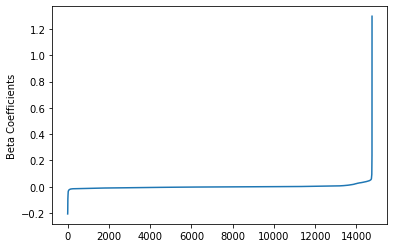

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
beta = np.sort(lr_model.coefficients)
plt.plot(beta)
plt.ylabel('Beta Coefficients')
plt.show()

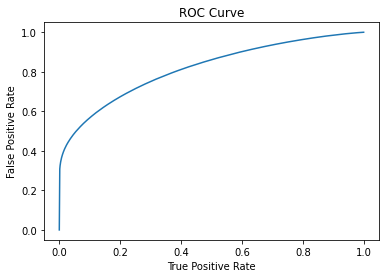

Training set areaUnderROC: 0.8152082347167017


In [ ]:
trainingSummary = lr_model.summary
roc = trainingSummary.roc.toPandas()
plt.plot(roc['FPR'],roc['TPR'])
plt.ylabel('False Positive Rate')
plt.xlabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()
print('Training set areaUnderROC: ' + str(trainingSummary.areaUnderROC))

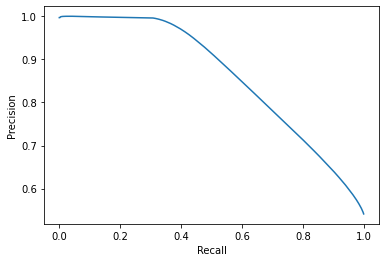

In [ ]:
pr = trainingSummary.pr.toPandas()
plt.plot(pr['recall'],pr['precision'])
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.show()

In [ ]:
trainingSummary = lr_model.summary
print('Test Area Under ROC' % trainingSummary.areaUnderROC)
# print("r2: %f" % trainingSummary.r2)


### Test evaluation

In [ ]:
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder
import numpy as np
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator

In [ ]:
# # https://stackoverflow.com/questions/45855366/how-to-save-load-pyspark-ml-model-to-hbase

# # loading:
# # from pyspark.ml.regression import LinearRegressionModel
# # model = LinearRegressionModel.load(model_path)

# basePath = "/content/drive/MyDrive/01_GMBA/2nd_semester(2022)/03-1AM_Big Data Analytics Techniques and Applications/0427_0525HW4/HW4/Model_save"
# modelName = "/lr_model_0530_V1"

# from pyspark.ml.classification import LogisticRegressionModel
# lr_model = LogisticRegressionModel.load(basePath + modelName)

In [ ]:
lr_predictions = lr_model.transform(test_df)
lr_predictions.show(10)

+------+-----+----------+---------+----------+----------+-------------+---------+-------+--------------+------+----+--------+------+-------+---------+--------------+-----+---------+-------------+-----------------+-------------+-----------+----------+--------+--------------+-------------+----------------+------------------+-------------------+----------------+----------------+--------------------+--------------------+--------------------+--------------------+----------+
|  Year|Month|DayofMonth|DayOfWeek|CRSDepTime|CRSArrTime|UniqueCarrier|FlightNum|TailNum|CRSElapsedTime|Origin|Dest|Distance|TaxiIn|TaxiOut|Cancelled|delay_DepDelay|label|Month_idx|DayOfWeek_idx|UniqueCarrier_idx|FlightNum_idx|TailNum_idx|Origin_idx|Dest_idx|      Month_oh| DayOfWeek_oh|UniqueCarrier_oh|      FlightNum_oh|         TailNum_oh|       Origin_oh|         Dest_oh|           _features|            features|       rawPrediction|         probability|prediction|
+------+-----+----------+---------+----------+------

In [ ]:
# Area under the curve for the training data
from pyspark.ml.evaluation import BinaryClassificationEvaluator
# evaluator = BinaryClassificationEvaluator()
lr_evaluator = BinaryClassificationEvaluator(rawPredictionCol='prediction', labelCol='delay_DepDelay', metricName='areaUnderROC')
print('Test Area Under ROC', lr_evaluator.evaluate(lr_predictions))

Test Area Under ROC 0.6732762232013803


In [ ]:
# from pyspark.ml.evaluation import MulticlassClassificationEvaluator
# lr_evaluator_mul = MulticlassClassificationEvaluator(labelCol="delay_DepDelay", predictionCol="prediction", metricName="accuracy")

# lr_accuracy = lr_evaluator_mul.evaluate(lr_predictions)
# print("Test accuracy = %g" % (lr_accuracy))
# print("Test Error = %g" % (1.0 - lr_accuracy))

In [ ]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
lr_evaluator_mul = MulticlassClassificationEvaluator(labelCol="delay_DepDelay", predictionCol="prediction", metricName="accuracy")

lr_accuracy = lr_evaluator_mul.evaluate(lr_predictions)
print("Test accuracy = %g" % (lr_accuracy))
print("Test Error = %g" % (1.0 - lr_accuracy))

Test accuracy = 0.677228
Test Error = 0.322772


In [ ]:
# https://stackoverflow.com/questions/45855366/how-to-save-load-pyspark-ml-model-to-hbase
basePath = "/content/drive/MyDrive/01_GMBA/2nd_semester(2022)/03-1AM_Big Data Analytics Techniques and Applications/0427_0525HW4/HW4/Model_save"
modelName = "/lr_model_0530_V1"
lr_model.save(basePath + modelName)

In [ ]:
# Select example rows to display.
df_predit = lr_predictions.select( "delay_DepDelay", "prediction")
df_predit.show(10).toPandas().head(10)

### Testing Plot

In [ ]:
#important: need to cast to float type, and order by prediction, else it won't work
# preds_and_labels = lr_predictions.select(['prediction','d']).withColumn('label', F.col('d').cast(FloatType())).orderBy('prediction')

#select only prediction and label columns
preds_and_labels = lr_predictions.select(['prediction','label'])

metrics = MulticlassMetrics(preds_and_labels.rdd.map(tuple))

print(metrics.confusionMatrix().toArray())

[[2033033. 1168548.]
 [1136235. 2802780.]]


In [ ]:
# https://stackoverflow.com/questions/37578416/precision-and-recall-on-pyspark-decisiontree-model-diverges-from-manual-results
metrics.recall()
print("Test Recall = %g" % (metrics.recall()))

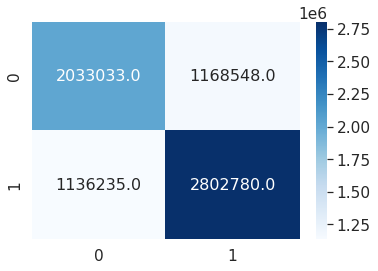

In [ ]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

cm_array = metrics.confusionMatrix().toArray()

df_cm = pd.DataFrame(cm_array, range(2), range(2))
# plt.figure(figsize=(10,7))
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}, cmap="Blues", fmt='.1f') # font size

plt.show()

In [ ]:
import sklearn 
# from pyspark.ml.classification import RandomForestClassifier

# rf = RandomForestClassifier(featuresCol = 'features', labelCol = 'label', numTrees=500)
# rfModel = rf.fit(train)
# predictions_train = rfModel.transform(train)

y_true = lr_predictions.select(['label']).collect()
y_pred = lr_predictions.select(['prediction']).collect()

from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_true, y_pred))

In [ ]:
from pyspark.mllib.evaluation import BinaryClassificationMetrics

# Scala version implements .roc() and .pr()
# Python: https://spark.apache.org/docs/latest/api/python/_modules/pyspark/mllib/common.html
# Scala: https://spark.apache.org/docs/latest/api/java/org/apache/spark/mllib/evaluation/BinaryClassificationMetrics.html
class CurveMetrics(BinaryClassificationMetrics):
    def __init__(self, *args):
        super(CurveMetrics, self).__init__(*args)

    def _to_list(self, rdd):
        points = []
        # Note this collect could be inefficient for large datasets 
        # considering there may be one probability per datapoint (at most)
        # The Scala version takes a numBins parameter, 
        # but it doesn't seem possible to pass this from Python to Java
        for row in rdd.collect():
            # Results are returned as type scala.Tuple2, 
            # which doesn't appear to have a py4j mapping
            points += [(float(row._1()), float(row._2()))]
        return points

    def get_curve(self, method):
        rdd = getattr(self._java_model, method)().toJavaRDD()
        return self._to_list(rdd)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import matplotlib.pyplot as plt
from pyspark.mllib.evaluation import BinaryClassificationMetrics

# # Create a Pipeline estimator and fit on train DF, predict on test DF
# model = estimator.fit(train)
# predictions = model.transform(test)

# Returns as a list (false positive rate, true positive rate)
preds = lr_predictions.select('label','probability').rdd.map(lambda row: (float(row['probability'][1]), float(row['label'])))
points = CurveMetrics(preds).get_curve('roc')

# plt.figure()
# x_val = [x[0] for x in points]
# y_val = [x[1] for x in points]

# title = 'ROC Curve'
# xlabel = 'True Positive Rate'
# ylabel = 'False Positive Rate'
# plt.title(title)
# plt.xlabel(xlabel)
# plt.ylabel(ylabel)
# plt.plot(x_val, y_val)

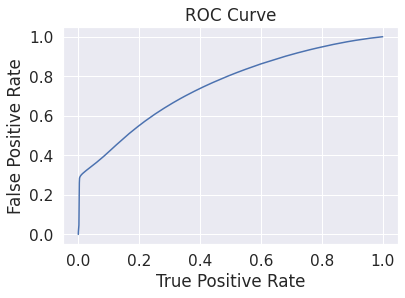

In [ ]:
plt.figure()
x_val = [x[0] for x in points]
y_val = [x[1] for x in points]

title = 'ROC Curve'
xlabel = 'True Positive Rate'
ylabel = 'False Positive Rate'
plt.title(title)
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.plot(x_val, y_val)

In [ ]:
metrics = CurveMetrics(preds)
metrics.get_curve('fMeasureByThreshold')
metrics.get_curve('precisionByThreshold')
metrics.get_curve('recallByThreshold')

[(0.99999925428444, 0.0018103510649235912),
 (0.9999986585642087, 0.00362146374156991),
 (0.9999969435715177, 0.005422167724672285),
 (0.9999926465516146, 0.00715305729985796),
 (0.9999900828240798, 0.008913903602804255),
 (0.9999879093532289, 0.010684904728720251),
 (0.9999858154983989, 0.01244625877281503),
 (0.9999836466045463, 0.014213197969543147),
 (0.9999813437425885, 0.01597480588421217),
 (0.9999789037021106, 0.017733875093138767),
 (0.9999762242978246, 0.019490151725748694),
 (0.9999732000169872, 0.021228403547587406),
 (0.999969754809369, 0.02297858728641551),
 (0.9999658844785515, 0.024728263284095137),
 (0.9999613738910185, 0.02645991447100354),
 (0.9999559603166606, 0.02819283501078315),
 (0.9999492597041274, 0.029918647174483975),
 (0.9999407240198831, 0.03164217450301662),
 (0.9999289436621085, 0.03335605474972804),
 (0.9999110970894265, 0.03506765016127128),
 (0.9998786947899677, 0.03677797621994331),
 (0.9997896235719278, 0.03843575106974713),
 (0.9995463085316204, 0.

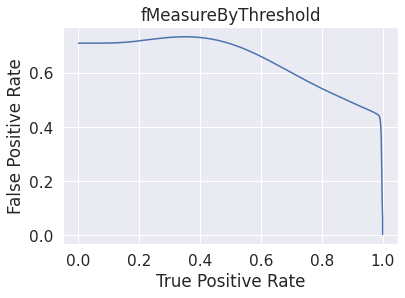

In [ ]:
points_1 = metrics.get_curve('fMeasureByThreshold')
# points_2 = metrics.get_curve('precisionByThreshold')
# points_3 = metrics.get_curve('recallByThreshold')

plt.figure()
x_val = [x[0] for x in points_1]
y_val = [x[1] for x in points_1]

title = 'f-MeasureByThreshold'
xlabel = 'Threshold'
ylabel = 'f-Measure'
plt.title(title)
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.plot(x_val, y_val)

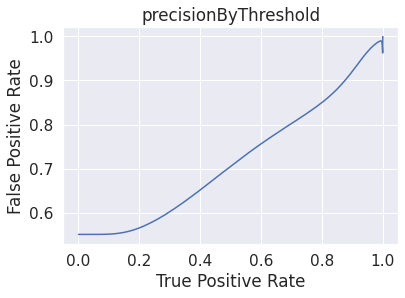

In [ ]:
# points_1 = metrics.get_curve('fMeasureByThreshold')
points_2 = metrics.get_curve('precisionByThreshold')
# points_3 = metrics.get_curve('recallByThreshold')

plt.figure()
x_val = [x[0] for x in points_2]
y_val = [x[1] for x in points_2]

title = 'PrecisionByThreshold'
xlabel = 'Threshold'
ylabel = 'Precision'
plt.title(title)
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.plot(x_val, y_val)

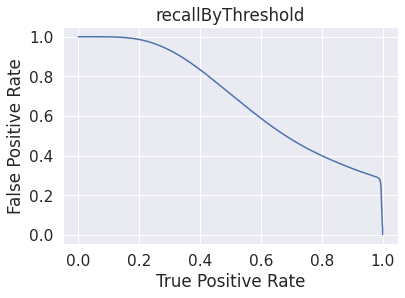

In [ ]:
# points_1 = metrics.get_curve('fMeasureByThreshold')
# points_2 = metrics.get_curve('precisionByThreshold')
points_3 = metrics.get_curve('recallByThreshold')

plt.figure()
x_val = [x[0] for x in points_3]
y_val = [x[1] for x in points_3]

title = 'RecallByThreshold'
xlabel = 'Threshold'
ylabel = 'Recall'
plt.title(title)
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.plot(x_val, y_val)

## Random Forest Classifier

In [ ]:
from pyspark.ml import Pipeline
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.feature import IndexToString, StringIndexer, VectorIndexer
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

In [ ]:
# from pyspark.ml.regression import RandomForestRegressor
# leb = 'delay_ArrDelay'
leb = 'delay_DepDelay'
rf = RandomForestClassifier(featuresCol = 'features', labelCol=leb, maxDepth=30)
# rf = RandomForestClassifier(featuresCol = 'features', labelCol=leb, numTrees=30)

In [ ]:
rf_model = rf.fit(train_df)

In [ ]:
basePath = "/content/drive/MyDrive/01_GMBA/2nd_semester(2022)/03-1AM_Big Data Analytics Techniques and Applications/0427_0525HW4/HW4/Model_save"
modelName = "/rf_model_0531_Plot_V1"
rf_model.save(basePath + modelName)

### Training Plot

In [ ]:
# https://swan-gallery.web.cern.ch/notebooks/apache_spark1/ML_Spark_MLlib.html

In [ ]:
model = rf_model

In [ ]:
# import matplotlib.pyplot as plt
# import numpy as np
# beta = np.sort(model.coefficients)
# plt.plot(beta)
# plt.ylabel('Beta Coefficients')
# plt.show()

AttributeError: ignored

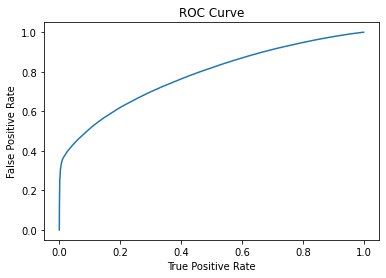

Training set areaUnderROC: 0.7804683443604191


In [ ]:
trainingSummary = model.summary
roc = trainingSummary.roc.toPandas()
plt.plot(roc['FPR'],roc['TPR'])
plt.ylabel('False Positive Rate')
plt.xlabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()
print('Training set areaUnderROC: ' + str(trainingSummary.areaUnderROC))

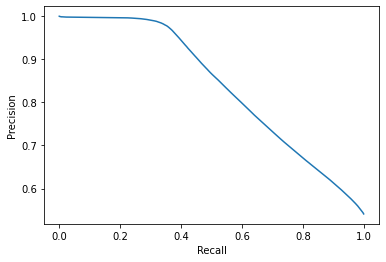

In [ ]:
pr = trainingSummary.pr.toPandas()
plt.plot(pr['recall'],pr['precision'])
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.show()

In [ ]:
# trainingSummary = model.summary
# print('Test Area Under ROC' % trainingSummary.areaUnderROC)
# print("r2: %f" % trainingSummary.r2)

TypeError: ignored

### Test evaluation

In [ ]:
# https://stackoverflow.com/questions/45855366/how-to-save-load-pyspark-ml-model-to-hbase

# loading:
# from pyspark.ml.regression import LinearRegressionModel
# model = LinearRegressionModel.load(model_path)

basePath = "/content/drive/MyDrive/01_GMBA/2nd_semester(2022)/03-1AM_Big Data Analytics Techniques and Applications/0427_0525HW4/HW4/Model_save"
modelName = "/rf_model_0531_Plot_V1"

# from pyspark.ml.classification import LogisticRegressionModel
from pyspark.ml.classification import RandomForestClassifier
rf_model = RandomForestClassifier.load(basePath + modelName)

Py4JJavaError: ignored

In [ ]:
rf_predictions = rf_model.transform(test_df)
rf_predictions.show()

+------+-----+----------+---------+----------+----------+-------------+---------+-------+--------------+------+----+--------+------+-------+---------+--------------+-----+---------+-------------+-----------------+-------------+-----------+----------+--------+--------------+-------------+----------------+------------------+-------------------+----------------+----------------+--------------------+--------------------+--------------------+--------------------+----------+
|  Year|Month|DayofMonth|DayOfWeek|CRSDepTime|CRSArrTime|UniqueCarrier|FlightNum|TailNum|CRSElapsedTime|Origin|Dest|Distance|TaxiIn|TaxiOut|Cancelled|delay_DepDelay|label|Month_idx|DayOfWeek_idx|UniqueCarrier_idx|FlightNum_idx|TailNum_idx|Origin_idx|Dest_idx|      Month_oh| DayOfWeek_oh|UniqueCarrier_oh|      FlightNum_oh|         TailNum_oh|       Origin_oh|         Dest_oh|           _features|            features|       rawPrediction|         probability|prediction|
+------+-----+----------+---------+----------+------

In [ ]:
# rf_evaluator = RegressionEvaluator(predictionCol="prediction", labelCol=leb, metricName="r2")
# print("R Squared (R2) on test data = %g" % rf_evaluator.evaluate(rf_predictions))

# Area under the curve for the training data
from pyspark.ml.evaluation import BinaryClassificationEvaluator
rf_evaluator = BinaryClassificationEvaluator(rawPredictionCol='prediction',
                                             labelCol='delay_DepDelay', metricName='areaUnderROC')
print('Test Area Under ROC', rf_evaluator.evaluate(rf_predictions))

Test Area Under ROC 0.6358156248580472


In [ ]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
rf_evaluator_mul = MulticlassClassificationEvaluator(labelCol="delay_DepDelay",
                                                     predictionCol="prediction", metricName="accuracy")

rf_accuracy = rf_evaluator_mul.evaluate(rf_predictions)
print("Test accuracy = %g" % (rf_accuracy))
print("Test Error = %g" % (1.0 - rf_accuracy))

Test accuracy = 0.644934
Test Error = 0.355066


In [ ]:
# https://stackoverflow.com/questions/45855366/how-to-save-load-pyspark-ml-model-to-hbase
basePath = "/content/drive/MyDrive/01_GMBA/2nd_semester(2022)/03-1AM_Big Data Analytics Techniques and Applications/0427_0525HW4/HW4/Model_save"
modelName = "/rf_model_0531_Plot_V1"
rf_model.save(basePath + modelName)

### Testing Plot

In [ ]:
#important: need to cast to float type, and order by prediction, else it won't work
# preds_and_labels = lr_predictions.select(['prediction','d']).withColumn('label', F.col('d').cast(FloatType())).orderBy('prediction')

#select only prediction and label columns
preds_and_labels = rf_predictions.select(['prediction','label'])

rf_metrics = MulticlassMetrics(preds_and_labels.rdd.map(tuple))

metrics = rf_metrics

print(metrics.confusionMatrix().toArray())

[[1752924. 1448657.]
 [1086723. 2852292.]]


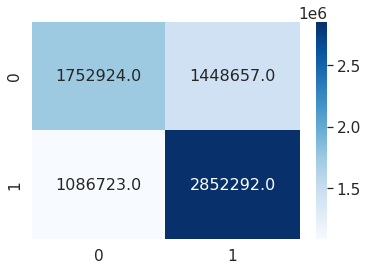

In [ ]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

cm_array = metrics.confusionMatrix().toArray()

df_cm = pd.DataFrame(cm_array, range(2), range(2))
# plt.figure(figsize=(10,7))
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}, cmap="Blues", fmt='.1f') # font size

plt.show()

In [ ]:
import sklearn 
# from pyspark.ml.classification import RandomForestClassifier

# rf = RandomForestClassifier(featuresCol = 'features', labelCol = 'label', numTrees=500)
# rfModel = rf.fit(train)
# predictions_train = rfModel.transform(train)

y_true = rf_predictions.select(['label']).collect()
y_pred = rf_predictions.select(['prediction']).collect()

from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_true, y_pred))

In [ ]:
from pyspark.mllib.evaluation import BinaryClassificationMetrics

# Scala version implements .roc() and .pr()
# Python: https://spark.apache.org/docs/latest/api/python/_modules/pyspark/mllib/common.html
# Scala: https://spark.apache.org/docs/latest/api/java/org/apache/spark/mllib/evaluation/BinaryClassificationMetrics.html
class CurveMetrics(BinaryClassificationMetrics):
    def __init__(self, *args):
        super(CurveMetrics, self).__init__(*args)

    def _to_list(self, rdd):
        points = []
        # Note this collect could be inefficient for large datasets 
        # considering there may be one probability per datapoint (at most)
        # The Scala version takes a numBins parameter, 
        # but it doesn't seem possible to pass this from Python to Java
        for row in rdd.collect():
            # Results are returned as type scala.Tuple2, 
            # which doesn't appear to have a py4j mapping
            points += [(float(row._1()), float(row._2()))]
        return points

    def get_curve(self, method):
        rdd = getattr(self._java_model, method)().toJavaRDD()
        return self._to_list(rdd)

In [ ]:
import matplotlib.pyplot as plt
from pyspark.mllib.evaluation import BinaryClassificationMetrics

# # Create a Pipeline estimator and fit on train DF, predict on test DF
# model = estimator.fit(train)
# predictions = model.transform(test)

# Returns as a list (false positive rate, true positive rate)
preds = rf_predictions.select('label','probability').rdd.map(lambda row: (float(row['probability'][1]), float(row['label'])))
points = CurveMetrics(preds).get_curve('roc')

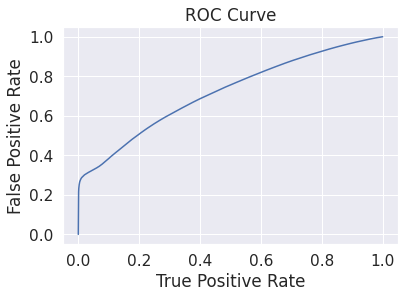

In [ ]:
plt.figure()
x_val = [x[0] for x in points]
y_val = [x[1] for x in points]

title = 'ROC Curve'
xlabel = 'True Positive Rate'
ylabel = 'False Positive Rate'
plt.title(title)
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.plot(x_val, y_val)

In [ ]:
metrics = CurveMetrics(preds)
metrics.get_curve('fMeasureByThreshold')
metrics.get_curve('precisionByThreshold')
metrics.get_curve('recallByThreshold')

[(0.8712914971042103, 0.0006773266920791112),
 (0.861175759299668, 0.0013043870104581983),
 (0.8551122380783118, 0.0020197942886736914),
 (0.8506964500255583, 0.0027753131176195063),
 (0.8464777378156777, 0.0037202193949502603),
 (0.8430902700028492, 0.004502902375340028),
 (0.8403553924220708, 0.00528609309687828),
 (0.8379196448047604, 0.006001500375093774),
 (0.8356757983013148, 0.006753465016000193),
 (0.8336271408828541, 0.007536655737538446),
 (0.8317224600652906, 0.008408193418913103),
 (0.8298957640500196, 0.009179452223461957),
 (0.8282786088154189, 0.010025095106263876),
 (0.8266925952138457, 0.010731870784955123),
 (0.825375515570293, 0.01150668377754337),
 (0.8239514570595077, 0.012172586293781568),
 (0.82265463647552, 0.01304056978711683),
 (0.8214102650749273, 0.01402203342713851),
 (0.820311613993509, 0.014826549276913136),
 (0.8191814002410736, 0.015577244564948344),
 (0.8181331266810276, 0.01650158732576545),
 (0.8171343950110082, 0.017400289158584062),
 (0.81610464514

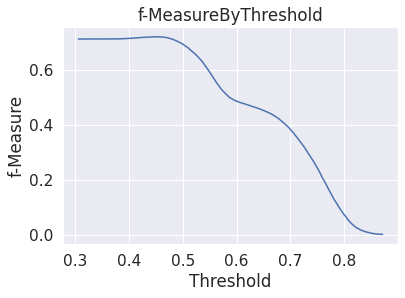

In [ ]:
points_1 = metrics.get_curve('fMeasureByThreshold')
# points_2 = metrics.get_curve('precisionByThreshold')
# points_3 = metrics.get_curve('recallByThreshold')

plt.figure()
x_val = [x[0] for x in points_1]
y_val = [x[1] for x in points_1]

title = 'f-MeasureByThreshold'
xlabel = 'Threshold'
ylabel = 'f-Measure'
plt.title(title)
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.plot(x_val, y_val)

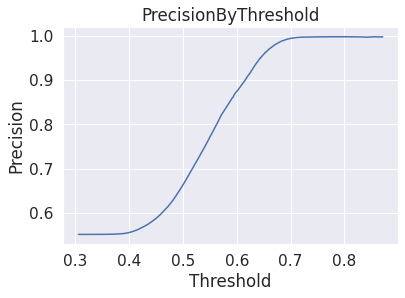

In [ ]:
# points_1 = metrics.get_curve('fMeasureByThreshold')
points_2 = metrics.get_curve('precisionByThreshold')
# points_3 = metrics.get_curve('recallByThreshold')

plt.figure()
x_val = [x[0] for x in points_2]
y_val = [x[1] for x in points_2]

title = 'PrecisionByThreshold'
xlabel = 'Threshold'
ylabel = 'Precision'
plt.title(title)
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.plot(x_val, y_val)

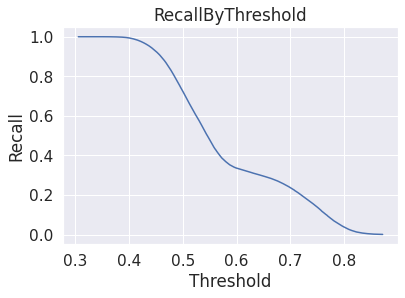

In [ ]:
# points_1 = metrics.get_curve('fMeasureByThreshold')
# points_2 = metrics.get_curve('precisionByThreshold')
points_3 = metrics.get_curve('recallByThreshold')

plt.figure()
x_val = [x[0] for x in points_3]
y_val = [x[1] for x in points_3]

title = 'RecallByThreshold'
xlabel = 'Threshold'
ylabel = 'Recall'
plt.title(title)
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.plot(x_val, y_val)

# Model Prediction_different Models(for the future improvement)

## Gradient-Boosted Trees

In [ ]:
from pyspark.ml.regression import GBTRegressor
# gb = GBTRegressor(featuresCol = 'features_vec', labelCol='delay_ArrDelay', maxDepth=10)
gb = GBTRegressor(featuresCol = 'features_vec', labelCol='delay_DepDelay', maxDepth=10)

In [ ]:
from pyspark.ml.evaluation import RegressionEvaluator
# gb_evaluator = RegressionEvaluator(predictionCol="prediction", labelCol="delay_ArrDelay", metricName="r2")
gb_evaluator = RegressionEvaluator(predictionCol="prediction", labelCol="delay_DepDelay", metricName="r2")

In [ ]:
gbparamGrid = (ParamGridBuilder().addGrid(gb.maxBins, [10, 20, 40]).addGrid(gb.maxIter, [5, 10, 20]).build())

In [ ]:
from pyspark.ml.evaluation import RegressionEvaluator
gbv = TrainValidationSplit(estimator=gb,estimatorParamMaps = gbparamGrid,evaluator=gb_evaluator,trainRatio=0.8)
gb_model = gbv.fit(train_df)

## LinearRegression_classification_TrainValidationSplit

In [ ]:
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder
import numpy as np
lr = LogisticRegression(featuresCol = 'features', labelCol='delay_DepDelay', maxIter=1000)

In [ ]:
# from pyspark.ml.evaluation import RegressionEvaluator
lr_evaluator = BinaryClassificationEvaluator(rawPredictionCol='prediction', labelCol='label', metricName='areaUnderROC')

In [ ]:
from pyspark.ml.tuning import ParamGridBuilder, TrainValidationSplit
lrparamGrid = (ParamGridBuilder().addGrid(lr.regParam, [0.001, 0.01, 0.1, 0.5, 1.0, 2.0]).addGrid(lr.elasticNetParam, [0.0, 0.25, 0.5, 0.75, 1.0])
             .build())

In [ ]:
from pyspark.ml.evaluation import RegressionEvaluator
lrv = TrainValidationSplit(estimator=lr,estimatorParamMaps = lrparamGrid,evaluator=lr_evaluator,trainRatio=0.8)
lr_model = lrv.fit(train_df)

In [ ]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator
evaluator = BinaryClassificationEvaluator()
print('Test Area Under ROC', evaluator.evaluate(predictions))